### Placement Prediction

The data set consists of placement data of a campus drive. It includes the secondary,
higher secondary percentage of students, their specialisation etc. It also shows who is placed
and who is not with the salary they get offered.


**Columns:**


1. Sl_no – serial number
2. Gender – gender of candidate
3. Ssc_p – Secondary education percentage(10th)
4. Ssc_b – Board of SSC (central/others)
5. Hsc_p – Higher secondary education percentage(12th)
6. Hsc_b - Board of HSC (central/others)
7. Hsc_s – Specialisation in HSC (Arts, Commerce, Science)
8. Degree_p – Degree percentage.
9. Degree_t – Degree type (Commerce & Management, Science & Technology, Others)
10. Workex – Work experience
11. Etest_p – Employee test percentage (Conducted by college)
12. Specialisation – Post Graduation MBA specialisation (Mkt & Fin, Mkt & Hr)
13. Mba_p – MBA percentage
14. Status – Status of placement (Placed/Not placed)
15. Salary – Salary offered by company to candidate


**What you have to find/perform?**


1. Which factor influenced in candidate getting placed?
2. Which degree is in demand by corporate?
3. Create a classification model to predict who will be placed and who will not.
4. Can you predict the salary? Create a model for it

## What we have done :

The code performs the following steps:

* Loads the dataset and performs data preprocessing.
* Encodes categorical variables using label encoding.
* Splits the data into features and target variables.
* Splits the data into training and testing sets.
* Performs feature scaling on the feature variables.
* Builds a Random Forest Classifier to identify the factors influencing candidate placement.
* Calculates the average placement status for each degree type to determine the degree demand.
* Builds a Random Forest Classifier to predict placement status.
* Evaluates the classification model using accuracy.
* Splits the data for the regression model to predict salary.
* Builds a Linear Regression model to predict salary.
* Evaluates the regression model using mean squared error (MSE).

Imports the required libraries for data manipulation, modeling, and evaluation.

### Importing necessary libraries

In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error


load the dataset from the CSV file into a pandas DataFrame called data.

In [63]:
# Load the dataset
data = pd.read_csv('placement_data.csv')


Desplaying few datasets

In [85]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


### Data preprocessing

perform data preprocessing tasks. The 'sl_no' column is dropped as it is unnecessary. Missing values in the 'salary' column are filled with 0.

In [65]:
data = data.drop(columns=['sl_no'])  # Drop unnecessary column
data['salary'] = data['salary'].fillna(0)  # Fill missing salary values with 0


### Encoding categorical variables

Encode the categorical variables using the LabelEncoder from scikit-learn. Each categorical column is transformed into numeric representation.

In [86]:
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['ssc_b'] = le.fit_transform(data['ssc_b'])
data['hsc_b'] = le.fit_transform(data['hsc_b'])
data['hsc_s'] = le.fit_transform(data['hsc_s'])
data['degree_t'] = le.fit_transform(data['degree_t'])
data['workex'] = le.fit_transform(data['workex'])
data['specialisation'] = le.fit_transform(data['specialisation'])
data['status'] = le.fit_transform(data['status'])


### Splitting the data into features and target

Separate the features (X) and the target variable (y) from the dataset. The 'status' column is the target variable.

In [67]:
X = data.drop(columns=['status', 'salary'])
y = data['status']


### Splitting the data into training and testing sets

 Split the dataset into training and testing sets for both classification and regression models. The data is split into 80% training and 20% testing, and a random_state of 42 is set for reproducibility.

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Feature scaling

Perform feature scaling on the training and testing sets using the StandardScaler from scikit-learn. It standardizes the features by subtracting the mean and scaling to unit variance.

In [69]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### 1. Which factor influenced the candidate getting placed?

For the question of which factors influenced the candidate getting placed, a Random Forest Classifier (rf_clf) is trained on the training set (X_train, y_train). The feature importances are then calculated using the feature_importances_ attribute of the trained classifier. The feature importances are sorted in descending order and displayed, indicating the relative importance of each feature in determining the placement status.

In [70]:
# Building a Random Forest Classifier to identify important features
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_clf.feature_importances_})
feature_importances = feature_importances.sort_values('Importance', ascending=False)
print("Factors influencing candidate getting placed:")
print(feature_importances)


Factors influencing candidate getting placed:
           Feature  Importance
1            ssc_p    0.272093
6         degree_p    0.214039
3            hsc_p    0.188781
11           mba_p    0.100634
9          etest_p    0.075529
8           workex    0.038986
10  specialisation    0.032375
5            hsc_s    0.020584
0           gender    0.018487
2            ssc_b    0.013448
7         degree_t    0.012630
4            hsc_b    0.012415


### 2. Which degree is in demand by corporate?

To determine which degree is in demand by corporate, the dataset is grouped by the 'degree_t' column. Then, the average placement status for each degree type is calculated using the mean() function. The results are sorted in descending order, indicating the degree demand by corporate.

In [72]:
# Calculating the average placement status for each degree type
degrees_demand = data.groupby('degree_t')['status'].mean().sort_values(ascending=False)
print("\nDegree demand by corporate:")
print(degrees_demand)



Degree demand by corporate:
degree_t
0    0.703448
2    0.694915
1    0.454545
Name: status, dtype: float64


### 3. Create a classification model to predict who will be placed and who will not.

For the task of creating a classification model to predict who will be placed and who will not, a Random Forest Classifier (clf) is trained on the training set (X_train, y_train). The trained model is then evaluated by predicting the target variable for the test set (X_test) and calculating the accuracy score using accuracy_score(). The accuracy of the classification model is printed.

In [73]:
# Training the Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluating the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nClassification Model Accuracy:", accuracy)



Classification Model Accuracy: 0.7906976744186046


### 4. Can you predict the salary? Create a model for it

To predict the salary, the dataset is filtered to include only the rows with non-null salary values. The features are separated into X_salary, excluding the 'salary' column, and the target variable is stored in y_salary.

In [74]:
# Splitting the data for regression model
salary_data = data.dropna(subset=['salary'])
X_salary = salary_data.drop(columns=['salary'])
y_salary = salary_data['salary']

Next, the data is split into training and testing sets for the regression model.

In [76]:
X_train_salary, X_test_salary, y_train_salary, y_test_salary = train_test_split(X_salary, y_salary,
                                                                                test_size=0.2, random_state=42)

The training set is used to train a Linear Regression model (regression_model) using fit()

In [77]:

# Training the Linear Regression model
regression_model = LinearRegression()
regression_model.fit(X_train_salary, y_train_salary)


LinearRegression()

Then, the model is evaluated by predicting the salaries for the test set (X_test_salary) and calculating the mean squared error (mean_squared_error()) between the predicted and actual salaries. The mean squared error (MSE) is printed as the evaluation metric for the regression model.

In [78]:
# Evaluating the model
y_pred_salary = regression_model.predict(X_test_salary)
mse = mean_squared_error(y_test_salary, y_pred_salary)
print("\nRegression Model MSE:", mse)


Regression Model MSE: 5922427490.991434


## Visualizations:

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns


### 1. Which factor influenced in candidate getting placed?

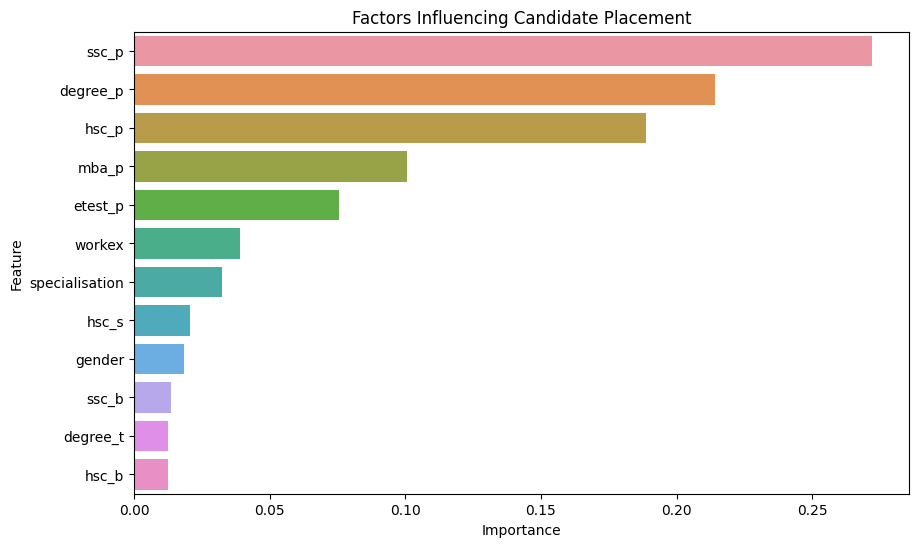

In [80]:
# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Factors Influencing Candidate Placement")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

### 2. Which degree is in demand by corporate?

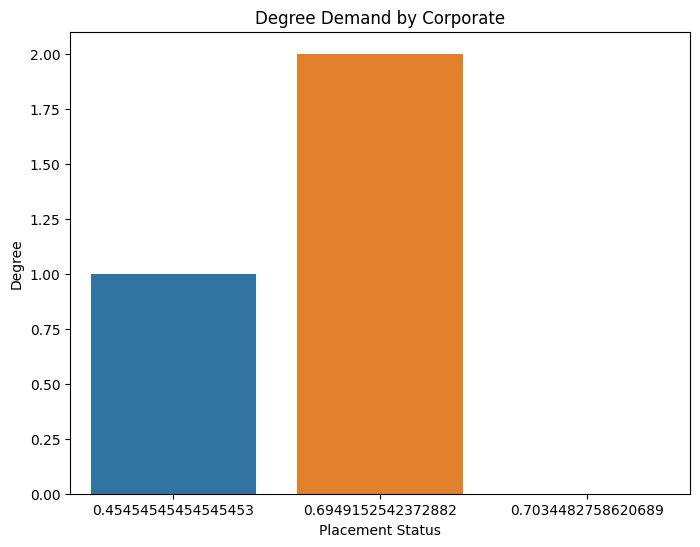

In [81]:
# Plotting degree demand
plt.figure(figsize=(8, 6))
sns.barplot(x=degrees_demand.values, y=degrees_demand.index)
plt.title("Degree Demand by Corporate")
plt.xlabel("Placement Status")
plt.ylabel("Degree")
plt.show()


### 3. Create a classification model to predict who will be placed and who will not.

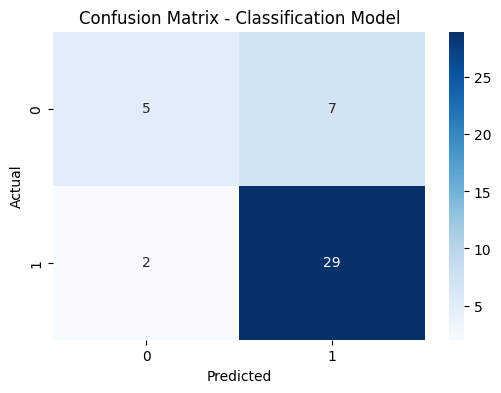

In [82]:
# Visualizing the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Classification Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 4. Can you predict the salary? Create a model for it

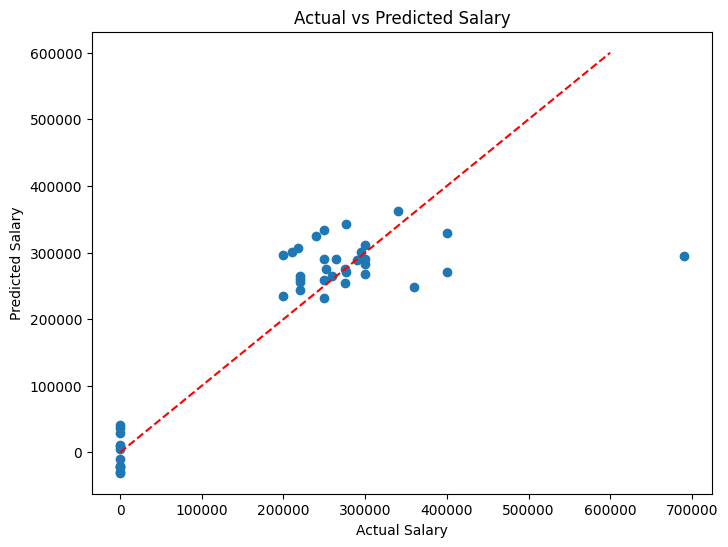

In [83]:
# Plotting actual vs predicted salaries
plt.figure(figsize=(8, 6))
plt.scatter(y_test_salary, y_pred_salary)
plt.plot([0, 600000], [0, 600000], color='red', linestyle='--')
plt.title("Actual vs Predicted Salary")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.show()